# Import

In [69]:
import missingno as mno
import seaborn as sns
import pandas as pd
import numpy as np
import re

In [70]:
clients = pd.read_csv('data/clients.csv', delimiter=";")  
psc = pd.read_csv('data/produits_sous-categorie.csv', delimiter=",")  
ventes = pd.read_csv('data/ventes.csv', delimiter=",")  

In [71]:
clients

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


In [72]:
psc

,product_id,category,sub_category,price,stock_quantity
0,0_1421,Vêtements,T-shirts,19.99,39
1,0_1368,Vêtements,T-shirts,5.13,76
2,0_731,Vêtements,T-shirts,17.99,2
3,1_587,Accessoires,Sacs à main,4.99,55
4,0_1507,Vêtements,T-shirts,3.99,81
...,...,...,...,...,...
3282,2_23,Montres,Montres connectées,115.99,38
3283,0_146,Vêtements,T-shirts,17.14,55
3284,0_802,Vêtements,T-shirts,11.22,64
3285,1_140,Accessoires,Sacs à main,38.56,1


In [73]:
ventes

,id_prod,date,session_id,client_id,quantity_sold
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,5
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,6
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,3
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,8
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,2
...,...,...,...,...,...
337011,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454,1
337012,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268,10
337013,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137,7
337014,2_227,2021-10-30 16:50:15.997750,s_112349,c_5,8


# Analyse

In [74]:
def info(df):
    print('info')
    print(df.info())
    print('------------')
    print('describe')
    print(df.describe())
    print('------------')
    print('nunique')
    print(df.nunique())
    print('------------------------------------------------')
    print('max')
    print(df.max())
    print('------------------------------------------------')
    print('min')
    print(df.min())
    print('------------------------------------------------')
    print('preview uniques')
    for i in df:
        uni =df[i].unique()
        print(i)
        print(uni)

In [75]:
def nan_exterminator_tavu(df):
    print(df.isna().sum())
    print('------------')
    print(df[df.isna().any(axis=1)])
    print('------------')
    mno.matrix(df, figsize= (20, 6))

## clients

In [76]:
info(clients)

info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB
None
------------
describe
             birth
count  8623.000000
mean   1977.816769
std      46.071018
min   -2001.000000
25%    1966.000000
50%    1979.000000
75%    1992.000000
max    2004.000000
------------
nunique
client_id    8623
sex             2
birth          77
dtype: int64
------------------------------------------------
max
client_id    ct_1
sex             m
birth        2004
dtype: object
------------------------------------------------
min
client_id      c_1
sex              f
birth        -2001
dtype: object
------------------------------------------------
preview uniques
client_id
['c_4410' 'c_7839' 'c_1699' ... 'c_5

-2001 dans birth \
ct_1 dans client_id

client_id    0
sex          0
birth        0
dtype: int64
------------
Empty DataFrame
Columns: [client_id, sex, birth]
Index: []
------------


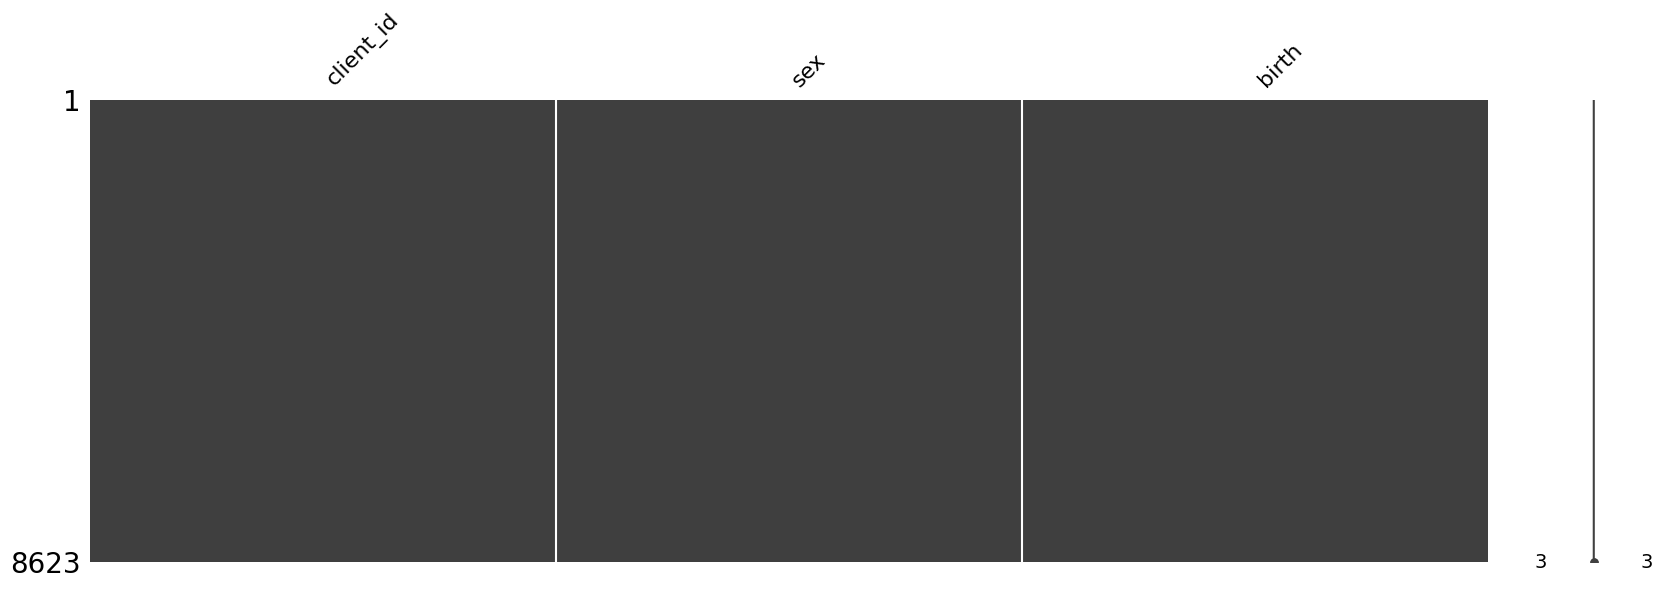

In [77]:
nan_exterminator_tavu(clients)

## psc

In [78]:
psc

,product_id,category,sub_category,price,stock_quantity
0,0_1421,Vêtements,T-shirts,19.99,39
1,0_1368,Vêtements,T-shirts,5.13,76
2,0_731,Vêtements,T-shirts,17.99,2
3,1_587,Accessoires,Sacs à main,4.99,55
4,0_1507,Vêtements,T-shirts,3.99,81
...,...,...,...,...,...
3282,2_23,Montres,Montres connectées,115.99,38
3283,0_146,Vêtements,T-shirts,17.14,55
3284,0_802,Vêtements,T-shirts,11.22,64
3285,1_140,Accessoires,Sacs à main,38.56,1


In [79]:
info(psc)

info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      3287 non-null   object 
 1   category        3287 non-null   object 
 2   sub_category    3287 non-null   object 
 3   price           3287 non-null   float64
 4   stock_quantity  3287 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 128.5+ KB
None
------------
describe
             price  stock_quantity
count  3287.000000     3287.000000
mean     21.856641       50.309705
std      29.847908       28.847379
min      -1.000000        1.000000
25%       6.990000       25.000000
50%      13.060000       51.000000
75%      22.990000       76.000000
max     300.000000       99.000000
------------
nunique
product_id        3287
category             3
sub_category         3
price             1455
stock_quantity      99
dtype: int64
-------------------

product_id        0
category          0
sub_category      0
price             0
stock_quantity    0
dtype: int64
------------
Empty DataFrame
Columns: [product_id, category, sub_category, price, stock_quantity]
Index: []
------------


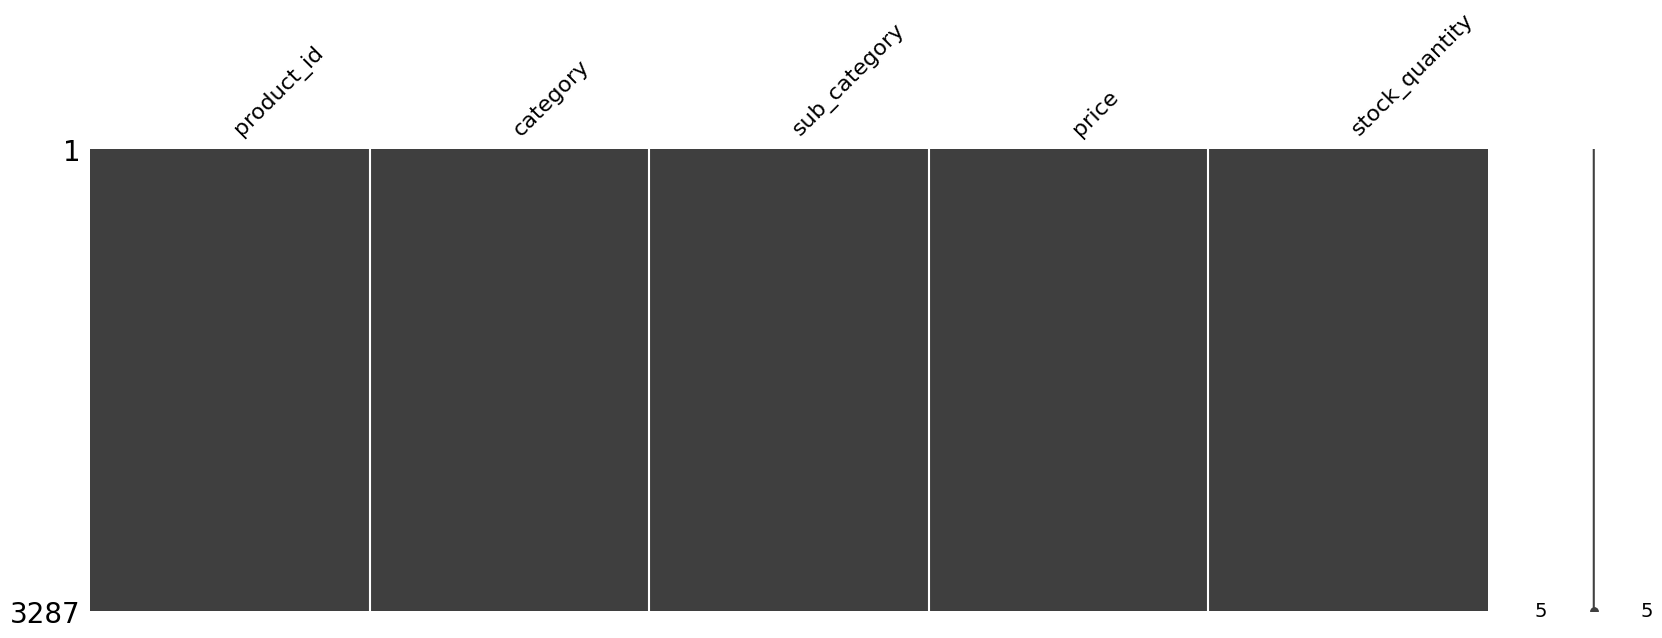

In [80]:
nan_exterminator_tavu(psc)

T_0 dans product_id \
-1.0 dans price

## ventes

In [81]:
ventes

,id_prod,date,session_id,client_id,quantity_sold
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,5
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,6
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,3
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,8
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,2
...,...,...,...,...,...
337011,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454,1
337012,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268,10
337013,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137,7
337014,2_227,2021-10-30 16:50:15.997750,s_112349,c_5,8


In [82]:
info(ventes)

info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337016 entries, 0 to 337015
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id_prod        337016 non-null  object
 1   date           337016 non-null  object
 2   session_id     337016 non-null  object
 3   client_id      337016 non-null  object
 4   quantity_sold  337016 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 12.9+ MB
None
------------
describe
       quantity_sold
count  337016.000000
mean        5.498522
std         2.874598
min         1.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        10.000000
------------
nunique
id_prod            3266
date             336855
session_id       169195
client_id          8602
quantity_sold        10
dtype: int64
------------------------------------------------
max
id_prod                                      T_0
date             test_2021-03-01 02:30:02.237450
sessi

id_prod          0
date             0
session_id       0
client_id        0
quantity_sold    0
dtype: int64
------------
Empty DataFrame
Columns: [id_prod, date, session_id, client_id, quantity_sold]
Index: []
------------


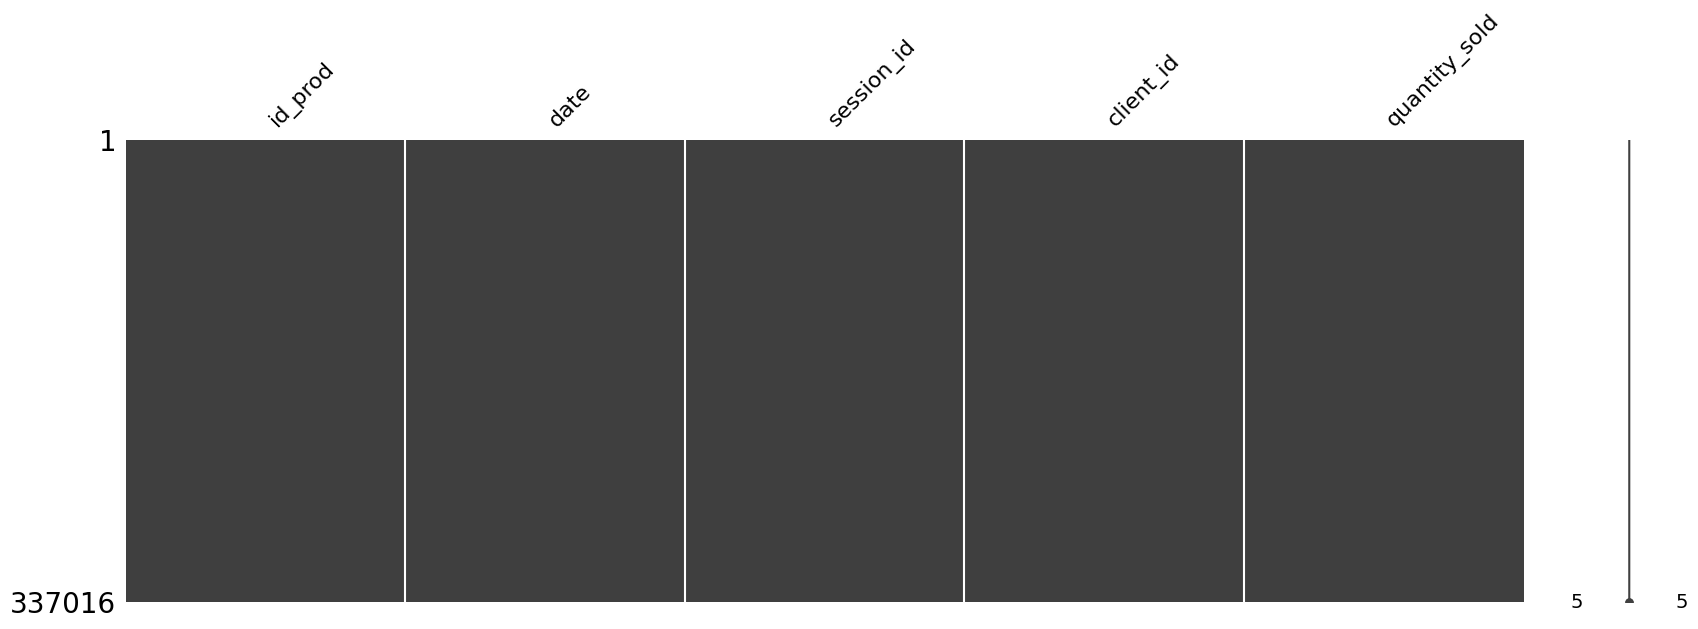

In [83]:
nan_exterminator_tavu(ventes)

T_0 dans id_prod \
ct_1 dans client_id

# Nettoyage mano

In [84]:
clientsh = clients

In [85]:
clientsh['client_id'] = clientsh['client_id'].astype('str').apply(lambda x: re.sub(r'(?<=c).+?(?=_\d+)', '', x))

# (?<=c) match c
# .+? match tout
# (?=_\d+) match _ + chiffres

In [86]:
clientsh['birth'] = clientsh['birth'].astype('str').apply(lambda x: re.sub(r'[^\w\s]', '', x))

In [87]:
info(clientsh)

info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   object
dtypes: object(3)
memory usage: 202.2+ KB
None
------------
describe
       client_id   sex birth
count       8623  8623  8623
unique      8622     2    76
top          c_1     f  2004
freq           2  4491   440
------------
nunique
client_id    8622
sex             2
birth          76
dtype: int64
------------------------------------------------
max
client_id    c_999
sex              m
birth         2004
dtype: object
------------------------------------------------
min
client_id     c_0
sex             f
birth        1929
dtype: object
------------------------------------------------
preview uniques
client_id
['c_4410' 'c_7839' 'c_1699' ... 'c_5119' 'c_5643' 'c_84']
sex
['f' 'm']


In [88]:
psc

,product_id,category,sub_category,price,stock_quantity
0,0_1421,Vêtements,T-shirts,19.99,39
1,0_1368,Vêtements,T-shirts,5.13,76
2,0_731,Vêtements,T-shirts,17.99,2
3,1_587,Accessoires,Sacs à main,4.99,55
4,0_1507,Vêtements,T-shirts,3.99,81
...,...,...,...,...,...
3282,2_23,Montres,Montres connectées,115.99,38
3283,0_146,Vêtements,T-shirts,17.14,55
3284,0_802,Vêtements,T-shirts,11.22,64
3285,1_140,Accessoires,Sacs à main,38.56,1


In [89]:
psc[psc['category'].isin(['n'])]

,product_id,category,sub_category,price,stock_quantity


In [90]:
psc[psc['category'].isin(['Vêtements'])]

,product_id,category,sub_category,price,stock_quantity
0,0_1421,Vêtements,T-shirts,19.99,39
1,0_1368,Vêtements,T-shirts,5.13,76
2,0_731,Vêtements,T-shirts,17.99,2
4,0_1507,Vêtements,T-shirts,3.99,81
5,0_1163,Vêtements,T-shirts,9.99,99
...,...,...,...,...,...
3280,0_1314,Vêtements,T-shirts,20.63,28
3281,0_607,Vêtements,T-shirts,14.99,6
3283,0_146,Vêtements,T-shirts,17.14,55
3284,0_802,Vêtements,T-shirts,11.22,64


In [91]:
ventes

,id_prod,date,session_id,client_id,quantity_sold
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,5
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,6
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,3
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,8
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,2
...,...,...,...,...,...
337011,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454,1
337012,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268,10
337013,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137,7
337014,2_227,2021-10-30 16:50:15.997750,s_112349,c_5,8


In [92]:
lol = ventes.merge(psc, left_on='id_prod', right_on='product_id', how="outer")

In [93]:
lol

,id_prod,date,session_id,client_id,quantity_sold,product_id,category,sub_category,price,stock_quantity
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,5.0,0_1483,Vêtements,T-shirts,4.99,48.0
1,0_1483,2021-10-18 19:16:14.767807,s_106741,c_1576,2.0,0_1483,Vêtements,T-shirts,4.99,48.0
2,0_1483,2021-11-14 11:11:45.276771,s_119491,c_182,10.0,0_1483,Vêtements,T-shirts,4.99,48.0
3,0_1483,2021-07-30 19:37:16.087057,s_69222,c_1196,10.0,0_1483,Vêtements,T-shirts,4.99,48.0
4,0_1483,2021-03-30 14:18:13.403218,s_13545,c_2890,4.0,0_1483,Vêtements,T-shirts,4.99,48.0
...,...,...,...,...,...,...,...,...,...,...
337033,NaN,NaN,NaN,NaN,NaN,0_525,Vêtements,T-shirts,2.99,96.0
337034,NaN,NaN,NaN,NaN,NaN,2_86,Montres,Montres connectées,132.36,67.0
337035,NaN,NaN,NaN,NaN,NaN,0_299,Vêtements,T-shirts,22.99,53.0
337036,NaN,NaN,NaN,NaN,NaN,0_510,Vêtements,T-shirts,23.66,1.0


In [94]:
loleh = lol.merge(clients, left_on='client_id', right_on='client_id', how="outer")

In [95]:
loleh

,id_prod,date,session_id,client_id,quantity_sold,product_id,category,sub_category,price,stock_quantity,sex,birth
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,5.0,0_1483,Vêtements,T-shirts,4.99,48.0,f,1977
1,0_1085,2021-09-29 11:14:59.793823,s_97382,c_4450,5.0,0_1085,Vêtements,T-shirts,3.99,43.0,f,1977
2,0_1453,2021-08-27 19:50:46.796939,s_81509,c_4450,8.0,0_1453,Vêtements,T-shirts,7.99,89.0,f,1977
3,0_1405,2021-08-27 20:07:25.878440,s_81509,c_4450,5.0,0_1405,Vêtements,T-shirts,4.99,75.0,f,1977
4,0_1392,2021-12-28 11:45:04.072281,s_141302,c_4450,9.0,0_1392,Vêtements,T-shirts,6.30,16.0,f,1977
...,...,...,...,...,...,...,...,...,...,...,...,...
337075,NaN,NaN,NaN,c_862,NaN,NaN,NaN,NaN,NaN,NaN,f,1956
337076,NaN,NaN,NaN,c_7584,NaN,NaN,NaN,NaN,NaN,NaN,f,1960
337077,NaN,NaN,NaN,c_90,NaN,NaN,NaN,NaN,NaN,NaN,m,2001
337078,NaN,NaN,NaN,c_587,NaN,NaN,NaN,NaN,NaN,NaN,m,1993


In [96]:
loleh[loleh.isna().any(axis=1)]

,id_prod,date,session_id,client_id,quantity_sold,product_id,category,sub_category,price,stock_quantity,sex,birth
18202,0_2245,2021-06-05 17:04:43.982913,s_44481,c_6714,3.0,NaN,NaN,NaN,NaN,NaN,f,1968
18203,0_2245,2021-04-22 04:57:20.090378,s_23987,c_6714,4.0,NaN,NaN,NaN,NaN,NaN,f,1968
20708,0_2245,2021-04-17 16:43:16.543156,s_21906,c_7808,2.0,NaN,NaN,NaN,NaN,NaN,m,1977
27016,0_2245,2021-11-01 14:00:26.535213,s_113219,c_7810,5.0,NaN,NaN,NaN,NaN,NaN,m,1978
30498,0_2245,2021-09-11 10:52:05.205583,s_88251,c_3468,4.0,NaN,NaN,NaN,NaN,NaN,f,1981
...,...,...,...,...,...,...,...,...,...,...,...,...
337075,NaN,NaN,NaN,c_862,NaN,NaN,NaN,NaN,NaN,NaN,f,1956
337076,NaN,NaN,NaN,c_7584,NaN,NaN,NaN,NaN,NaN,NaN,f,1960
337077,NaN,NaN,NaN,c_90,NaN,NaN,NaN,NaN,NaN,NaN,m,2001
337078,NaN,NaN,NaN,c_587,NaN,NaN,NaN,NaN,NaN,NaN,m,1993


# Pipeline ?

In [97]:
truc = {'col': ['client_id', 'date'], 'pattern': ['(?<=c).+?(?=_\d+)', '.+?(?=test_\d+)'], 'replace': ['', '']}

In [98]:
truc

{'col': ['client_id', 'date'],
 'pattern': ['(?<=c).+?(?=_\\d+)', '.+?(?=test_\\d+)'],
 'replace': ['', '']}

In [99]:
for i in range(len(truc['col'])):
    print(truc['col'][i], truc['pattern'][i], truc['replace'][i])

client_id (?<=c).+?(?=_\d+) 
date .+?(?=test_\d+) 


In [100]:
def naitoier(df, 
             regex_change: None,
             to_int = None,
             to_float = None, 
             to_datetime = None):
    
    if regex_change is not None:
        for i in range(len(regex_change['col'])):
            pattern = regex_change['pattern'][i]
            replace = regex_change['replace'][i]
            col = regex_change['col'][i]
            
            df[col] = df[col].astype('str').apply(lambda x: re.sub(fr'{pattern}', fr'{replace}', x))

    if to_int is not None:
        for i in to_int:
            df[i] = df[i].astype('int')
            
    if to_float is not None:
        for i in to_float:
            df[i] = df[i].astype('float')
            
    if to_datetime is not None:
        for i in to_datetime:
            df[i] = df[i].astype('datetime64[ns]')
            
    return df

In [101]:
clean_clients = naitoier(clients, 
                         regex_change = {'col': ['client_id', 'birth'], \
                                        'pattern': ['(?<=c).+?(?=_\d+)', '[-]'], \
                                        'replace': ['', '']},
                         to_int = ['birth'])

clean_psc = naitoier(psc,
                     regex_change = {'col': ['price', 'product_id'], \
                                        'pattern': ['[-]', '[a-zA-Z]'], \
                                        'replace': ['', '0']},
                     to_float = ['price'])

clean_ventes = naitoier(ventes,
                       regex_change = {'col': ['client_id', 'date', 'id_prod'], \
                                      'pattern': ['(?<=c).+?(?=_\d+)', '[test_]', '[a-zA-Z]'], \
                                      'replace': ['', '', '0']},
                       to_datetime = ['date'])

In [102]:
clean_clients

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


In [103]:
info(clean_clients)

info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB
None
------------
describe
             birth
count  8623.000000
mean   1978.280877
std      16.919535
min    1929.000000
25%    1966.000000
50%    1979.000000
75%    1992.000000
max    2004.000000
------------
nunique
client_id    8622
sex             2
birth          76
dtype: int64
------------------------------------------------
max
client_id    c_999
sex              m
birth         2004
dtype: object
------------------------------------------------
min
client_id     c_0
sex             f
birth        1929
dtype: object
------------------------------------------------
preview uniques
client_id
['c_4410' 'c_7839' 'c_1699' ... 'c_5

In [104]:
clean_psc

,product_id,category,sub_category,price,stock_quantity
0,0_1421,Vêtements,T-shirts,19.99,39
1,0_1368,Vêtements,T-shirts,5.13,76
2,0_731,Vêtements,T-shirts,17.99,2
3,1_587,Accessoires,Sacs à main,4.99,55
4,0_1507,Vêtements,T-shirts,3.99,81
...,...,...,...,...,...
3282,2_23,Montres,Montres connectées,115.99,38
3283,0_146,Vêtements,T-shirts,17.14,55
3284,0_802,Vêtements,T-shirts,11.22,64
3285,1_140,Accessoires,Sacs à main,38.56,1


In [105]:
info(clean_psc)

info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      3287 non-null   object 
 1   category        3287 non-null   object 
 2   sub_category    3287 non-null   object 
 3   price           3287 non-null   float64
 4   stock_quantity  3287 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 128.5+ KB
None
------------
describe
             price  stock_quantity
count  3287.000000     3287.000000
mean     21.857250       50.309705
std      29.847462       28.847379
min       0.620000        1.000000
25%       6.990000       25.000000
50%      13.060000       51.000000
75%      22.990000       76.000000
max     300.000000       99.000000
------------
nunique
product_id        3286
category             3
sub_category         3
price             1455
stock_quantity      99
dtype: int64
-------------------

In [106]:
clean_ventes

,id_prod,date,session_id,client_id,quantity_sold
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,5
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,6
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,3
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,8
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,2
...,...,...,...,...,...
337011,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454,1
337012,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268,10
337013,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137,7
337014,2_227,2021-10-30 16:50:15.997750,s_112349,c_5,8


In [107]:
info(clean_ventes)

info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337016 entries, 0 to 337015
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id_prod        337016 non-null  object        
 1   date           337016 non-null  datetime64[ns]
 2   session_id     337016 non-null  object        
 3   client_id      337016 non-null  object        
 4   quantity_sold  337016 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 12.9+ MB
None
------------
describe
                                date  quantity_sold
count                         337016  337016.000000
mean   2021-09-02 23:36:14.710825216       5.498522
min       2021-03-01 00:01:07.843138       1.000000
25%    2021-05-30 17:03:33.746926592       3.000000
50%    2021-09-07 02:42:00.239463680       5.000000
75%    2021-12-08 03:28:22.504391168       8.000000
max       2022-02-28 23:59:58.040472      10.000000
std     

In [108]:
clean_ventes = clean_ventes.rename({'id_prod': 'product_id'}, axis= 1)

In [109]:
cli_ven = clients.merge(clean_ventes, left_on='client_id', right_on='client_id', how="outer")

In [110]:
cli_ven_psc = cli_ven.merge(clean_psc, left_on='product_id', right_on='product_id', how="outer")

In [111]:
cli_ven_psc

,client_id,sex,birth,product_id,date,session_id,quantity_sold,category,sub_category,price,stock_quantity
0,c_4410,f,1967.0,0_1455,2021-03-22 14:29:25.189266,s_9942,10.0,Vêtements,T-shirts,8.99,88.0
1,c_4389,m,1984.0,0_1455,2021-07-09 11:16:18.579726,s_59967,2.0,Vêtements,T-shirts,8.99,88.0
2,c_5019,f,1977.0,0_1455,2022-01-15 00:01:53.456196,s_149928,1.0,Vêtements,T-shirts,8.99,88.0
3,c_7049,f,1987.0,0_1455,2021-03-04 14:01:38.698752,s_1637,5.0,Vêtements,T-shirts,8.99,88.0
4,c_5110,f,1982.0,0_1455,2021-09-05 11:48:41.065009,s_85364,4.0,Vêtements,T-shirts,8.99,88.0
...,...,...,...,...,...,...,...,...,...,...,...
338073,NaN,NaN,NaN,0_525,NaT,NaN,NaN,Vêtements,T-shirts,2.99,96.0
338074,NaN,NaN,NaN,2_86,NaT,NaN,NaN,Montres,Montres connectées,132.36,67.0
338075,NaN,NaN,NaN,0_299,NaT,NaN,NaN,Vêtements,T-shirts,22.99,53.0
338076,NaN,NaN,NaN,0_510,NaT,NaN,NaN,Vêtements,T-shirts,23.66,1.0


client_id          22
sex                22
birth              22
product_id         21
date               43
session_id         43
quantity_sold      43
category          124
sub_category      124
price             124
stock_quantity    124
dtype: int64
------------
       client_id  sex   birth product_id                       date  \
268175    c_4505    m  1976.0     0_2245 2022-01-09 09:23:31.000720   
268176    c_3468    f  1981.0     0_2245 2021-09-11 10:52:05.205583   
268177    c_1403    f  1978.0     0_2245 2022-02-15 14:26:50.187952   
268178    c_3065    f  1977.0     0_2245 2022-01-26 13:34:33.440366   
268179    c_7102    m  1983.0     0_2245 2021-04-25 19:58:42.716401   
...          ...  ...     ...        ...                        ...   
338073       NaN  NaN     NaN      0_525                        NaT   
338074       NaN  NaN     NaN       2_86                        NaT   
338075       NaN  NaN     NaN      0_299                        NaT   
338076       NaN  NaN 

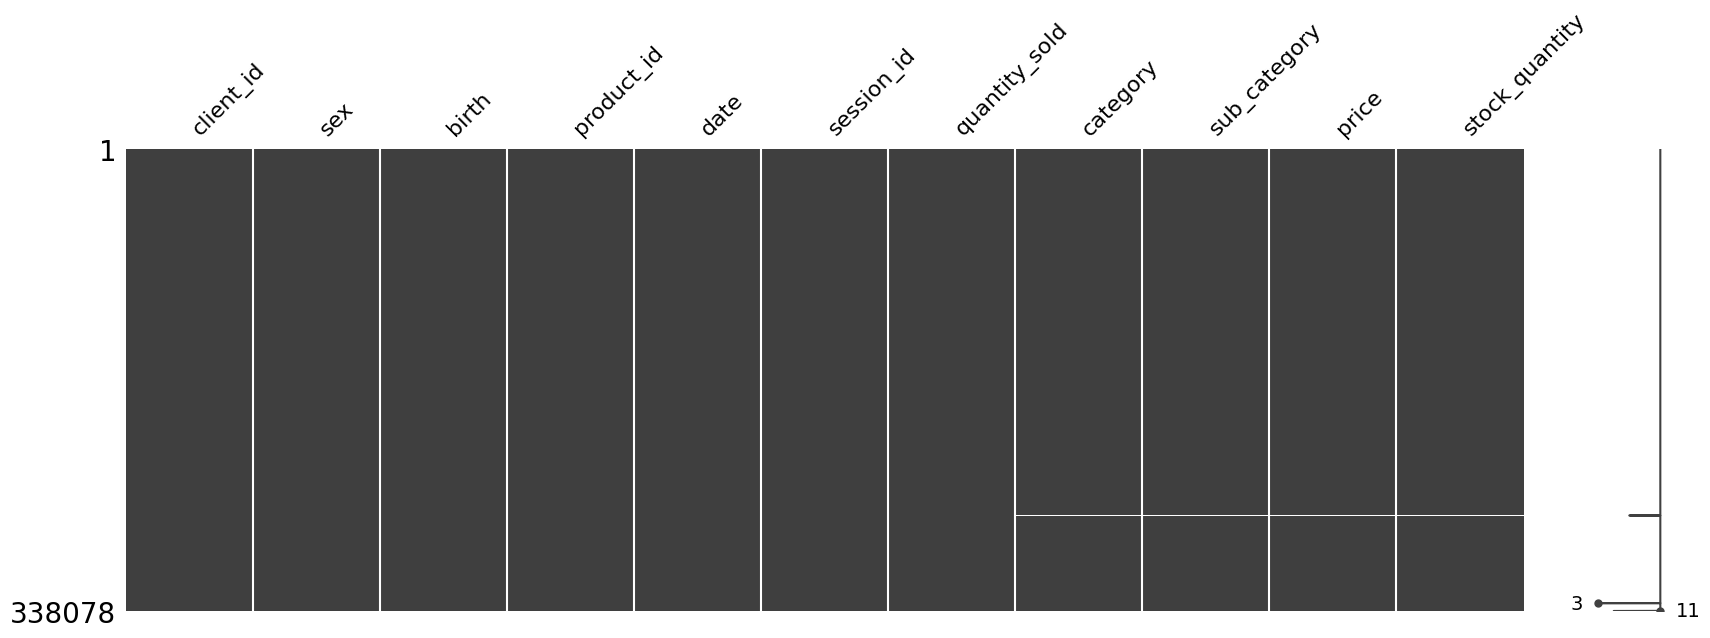

In [112]:
nan_exterminator_tavu(cli_ven_psc)

In [113]:
cli_ven_psc[cli_ven_psc['quantity_sold'].isnull()]

,client_id,sex,birth,product_id,date,session_id,quantity_sold,category,sub_category,price,stock_quantity
332334,c_8253,f,2001.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
332335,c_3789,f,1997.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
332336,c_4406,f,1998.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
332337,c_2706,f,1967.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
332338,c_3443,m,1959.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
332339,c_4447,m,1956.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
332340,c_3017,f,1992.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
332341,c_4086,f,1992.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
332342,c_6930,m,2004.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
332343,c_4358,m,1999.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
# cli_ven_psc['client_id'] = cli_ven_psc['client_id'].fillna('tbd')
# cli_ven_psc['sex'] = cli_ven_psc['sex'].fillna('tbd')
# cli_ven_psc['birth'] = cli_ven_psc['birth'].fillna('tbd')
# cli_ven_psc['session_id'] = cli_ven_psc['session_id'].fillna('tbd')
# cli_ven_psc['product_id'] = cli_ven_psc['product_id'].fillna('tbd')
# cli_ven_psc['price'] = cli_ven_psc['price'].fillna('tbd')
# cli_ven_psc['stock_quantity'] = cli_ven_psc['stock_quantity'].fillna('tbd')
# cli_ven_psc['quantity_sold'] = cli_ven_psc['quantity_sold'].fillna(0)

In [46]:
cli_ven_psc['product_id'].astype(str).str[0].unique()

array(['0', '1', '2', 'n'], dtype=object)

In [47]:
cli_ven_psc['category'] = cli_ven_psc['product_id'].str[0]
cli_ven_psc['sub_category'] = cli_ven_psc['product_id'].str[0]

In [48]:
cli_ven_psc['category'].replace(['0', '1', '2'], ['Vêtements', 'Accessoires-aged', 'Montres'], inplace=True)
cli_ven_psc['sub_category'].replace(['0', '1', '2'], ['T-shirts', 'Sacs à main', 'Montres connectées'], inplace=True)

client_id          22
sex                22
birth              22
product_id         21
date               43
session_id         43
quantity_sold       0
category           21
sub_category       21
price             124
stock_quantity    124
dtype: int64
------------
       client_id  sex   birth product_id                       date  \
268175    c_4505    m  1976.0     0_2245 2022-01-09 09:23:31.000720   
268176    c_3468    f  1981.0     0_2245 2021-09-11 10:52:05.205583   
268177    c_1403    f  1978.0     0_2245 2022-02-15 14:26:50.187952   
268178    c_3065    f  1977.0     0_2245 2022-01-26 13:34:33.440366   
268179    c_7102    m  1983.0     0_2245 2021-04-25 19:58:42.716401   
...          ...  ...     ...        ...                        ...   
338073       NaN  NaN     NaN      0_525                        NaT   
338074       NaN  NaN     NaN       2_86                        NaT   
338075       NaN  NaN     NaN      0_299                        NaT   
338076       NaN  NaN 

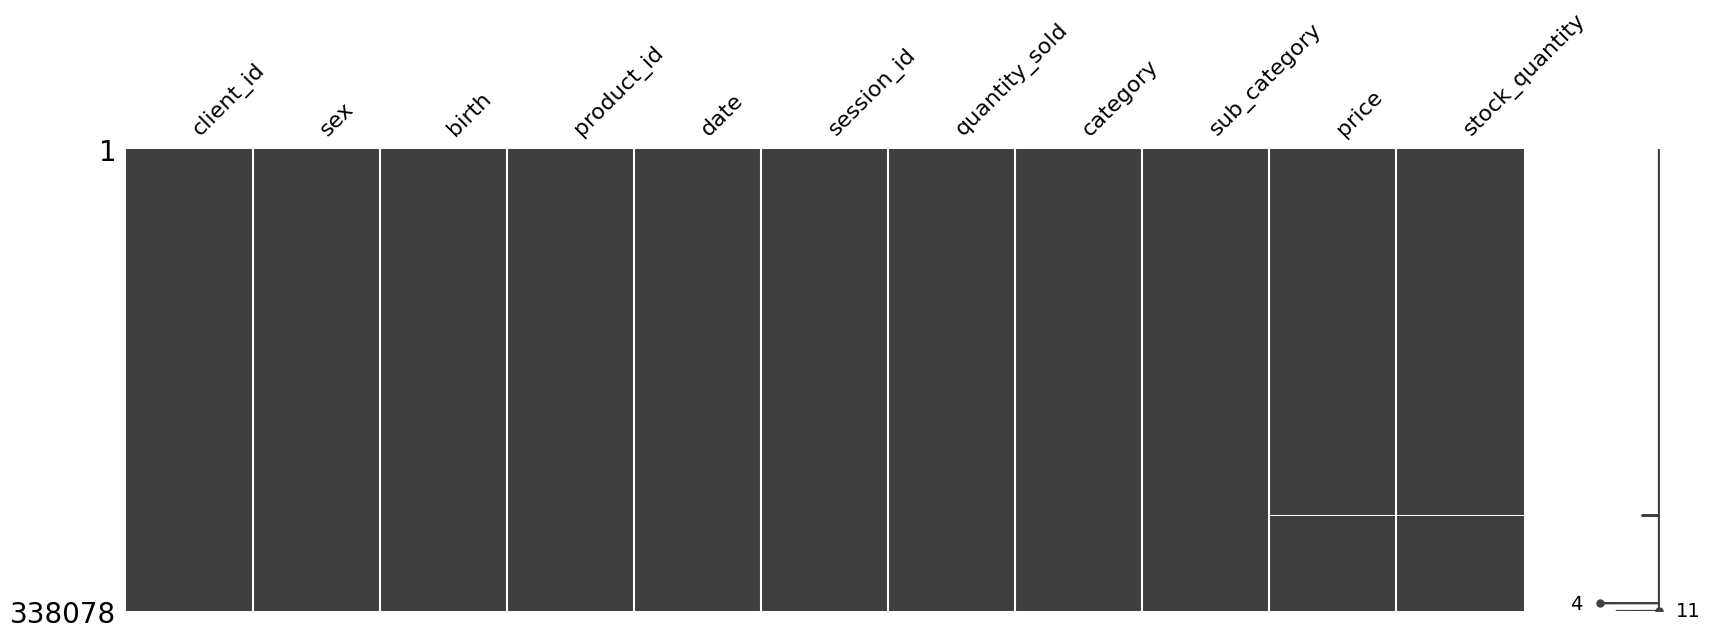

In [49]:
nan_exterminator_tavu(cli_ven_psc)

In [50]:
cli_ven_psc[cli_ven_psc.duplicated(keep=False)].sort_values(by=['date', 'quantity_sold'])

,client_id,sex,birth,product_id,date,session_id,quantity_sold,category,sub_category,price,stock_quantity
112987,c_1,m,1955.0,0_0,2021-03-01 02:30:02.237413,s_0,5.0,Vêtements,T-shirts,1.00,89.0
112988,c_1,m,1955.0,0_0,2021-03-01 02:30:02.237413,s_0,5.0,Vêtements,T-shirts,3.75,96.0
113069,c_1,m,1955.0,0_0,2021-03-01 02:30:02.237413,s_0,5.0,Vêtements,T-shirts,1.00,89.0
113070,c_1,m,1955.0,0_0,2021-03-01 02:30:02.237413,s_0,5.0,Vêtements,T-shirts,3.75,96.0
113175,c_1,m,2001.0,0_0,2021-03-01 02:30:02.237413,s_0,5.0,Vêtements,T-shirts,1.00,89.0
...,...,...,...,...,...,...,...,...,...,...,...
112606,c_0,f,2001.0,0_0,2021-03-01 02:30:02.237443,s_0,8.0,Vêtements,T-shirts,3.75,96.0
112603,c_0,f,2001.0,0_0,2021-03-01 02:30:02.237446,s_0,5.0,Vêtements,T-shirts,1.00,89.0
112604,c_0,f,2001.0,0_0,2021-03-01 02:30:02.237446,s_0,5.0,Vêtements,T-shirts,3.75,96.0
112677,c_0,f,2001.0,0_0,2021-03-01 02:30:02.237446,s_0,5.0,Vêtements,T-shirts,1.00,89.0


In [51]:
cli_ven_psc.drop_duplicates()

,client_id,sex,birth,product_id,date,session_id,quantity_sold,category,sub_category,price,stock_quantity
0,c_4410,f,1967.0,0_1455,2021-03-22 14:29:25.189266,s_9942,10.0,Vêtements,T-shirts,8.99,88.0
1,c_4389,m,1984.0,0_1455,2021-07-09 11:16:18.579726,s_59967,2.0,Vêtements,T-shirts,8.99,88.0
2,c_5019,f,1977.0,0_1455,2022-01-15 00:01:53.456196,s_149928,1.0,Vêtements,T-shirts,8.99,88.0
3,c_7049,f,1987.0,0_1455,2021-03-04 14:01:38.698752,s_1637,5.0,Vêtements,T-shirts,8.99,88.0
4,c_5110,f,1982.0,0_1455,2021-09-05 11:48:41.065009,s_85364,4.0,Vêtements,T-shirts,8.99,88.0
...,...,...,...,...,...,...,...,...,...,...,...
338073,NaN,NaN,NaN,0_525,NaT,NaN,0.0,Vêtements,T-shirts,2.99,96.0
338074,NaN,NaN,NaN,2_86,NaT,NaN,0.0,Montres,Montres connectées,132.36,67.0
338075,NaN,NaN,NaN,0_299,NaT,NaN,0.0,Vêtements,T-shirts,22.99,53.0
338076,NaN,NaN,NaN,0_510,NaT,NaN,0.0,Vêtements,T-shirts,23.66,1.0


In [59]:
cli_ven_psc[cli_ven_psc['product_id'].isin(['0_2245'])]

,client_id,sex,birth,product_id,date,session_id,quantity_sold,category,sub_category,price,stock_quantity
268175,c_4505,m,1976.0,0_2245,2022-01-09 09:23:31.000720,s_147220,9.0,Vêtements,T-shirts,NaN,NaN
268176,c_3468,f,1981.0,0_2245,2021-09-11 10:52:05.205583,s_88251,4.0,Vêtements,T-shirts,NaN,NaN
268177,c_1403,f,1978.0,0_2245,2022-02-15 14:26:50.187952,s_165575,8.0,Vêtements,T-shirts,NaN,NaN
268178,c_3065,f,1977.0,0_2245,2022-01-26 13:34:33.440366,s_155484,7.0,Vêtements,T-shirts,NaN,NaN
268179,c_7102,m,1983.0,0_2245,2021-04-25 19:58:42.716401,s_25704,10.0,Vêtements,T-shirts,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
268273,c_8138,f,1984.0,0_2245,2021-10-04 21:20:27.540982,s_100047,3.0,Vêtements,T-shirts,NaN,NaN
268274,c_7416,m,1933.0,0_2245,2021-11-12 09:25:22.905886,s_118458,9.0,Vêtements,T-shirts,NaN,NaN
268275,c_4283,f,1976.0,0_2245,2021-09-01 02:46:38.931757,s_83377,7.0,Vêtements,T-shirts,NaN,NaN
268276,c_6236,f,1976.0,0_2245,2022-02-25 00:08:08.736068,s_170426,10.0,Vêtements,T-shirts,NaN,NaN


In [67]:
cli_ven_psc[cli_ven_psc['price'].isnull()]

,client_id,sex,birth,product_id,date,session_id,quantity_sold,category,sub_category,price,stock_quantity
268175,c_4505,m,1976.0,0_2245,2022-01-09 09:23:31.000720,s_147220,9.0,Vêtements,T-shirts,NaN,NaN
268176,c_3468,f,1981.0,0_2245,2021-09-11 10:52:05.205583,s_88251,4.0,Vêtements,T-shirts,NaN,NaN
268177,c_1403,f,1978.0,0_2245,2022-02-15 14:26:50.187952,s_165575,8.0,Vêtements,T-shirts,NaN,NaN
268178,c_3065,f,1977.0,0_2245,2022-01-26 13:34:33.440366,s_155484,7.0,Vêtements,T-shirts,NaN,NaN
268179,c_7102,m,1983.0,0_2245,2021-04-25 19:58:42.716401,s_25704,10.0,Vêtements,T-shirts,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
332350,c_862,f,1956.0,NaN,NaT,NaN,0.0,NaN,NaN,NaN,NaN
332351,c_7584,f,1960.0,NaN,NaT,NaN,0.0,NaN,NaN,NaN,NaN
332352,c_90,m,2001.0,NaN,NaT,NaN,0.0,NaN,NaN,NaN,NaN
332353,c_587,m,1993.0,NaN,NaT,NaN,0.0,NaN,NaN,NaN,NaN


In [52]:
cli_ven_psc[cli_ven_psc.isna().any(axis=1)]

,client_id,sex,birth,product_id,date,session_id,quantity_sold,category,sub_category,price,stock_quantity
268175,c_4505,m,1976.0,0_2245,2022-01-09 09:23:31.000720,s_147220,9.0,Vêtements,T-shirts,NaN,NaN
268176,c_3468,f,1981.0,0_2245,2021-09-11 10:52:05.205583,s_88251,4.0,Vêtements,T-shirts,NaN,NaN
268177,c_1403,f,1978.0,0_2245,2022-02-15 14:26:50.187952,s_165575,8.0,Vêtements,T-shirts,NaN,NaN
268178,c_3065,f,1977.0,0_2245,2022-01-26 13:34:33.440366,s_155484,7.0,Vêtements,T-shirts,NaN,NaN
268179,c_7102,m,1983.0,0_2245,2021-04-25 19:58:42.716401,s_25704,10.0,Vêtements,T-shirts,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
338073,NaN,NaN,NaN,0_525,NaT,NaN,0.0,Vêtements,T-shirts,2.99,96.0
338074,NaN,NaN,NaN,2_86,NaT,NaN,0.0,Montres,Montres connectées,132.36,67.0
338075,NaN,NaN,NaN,0_299,NaT,NaN,0.0,Vêtements,T-shirts,22.99,53.0
338076,NaN,NaN,NaN,0_510,NaT,NaN,0.0,Vêtements,T-shirts,23.66,1.0


In [53]:
cli_ven_psc[cli_ven_psc['date'].isnull()]

,client_id,sex,birth,product_id,date,session_id,quantity_sold,category,sub_category,price,stock_quantity
332334,c_8253,f,2001.0,NaN,NaT,NaN,0.0,NaN,NaN,NaN,NaN
332335,c_3789,f,1997.0,NaN,NaT,NaN,0.0,NaN,NaN,NaN,NaN
332336,c_4406,f,1998.0,NaN,NaT,NaN,0.0,NaN,NaN,NaN,NaN
332337,c_2706,f,1967.0,NaN,NaT,NaN,0.0,NaN,NaN,NaN,NaN
332338,c_3443,m,1959.0,NaN,NaT,NaN,0.0,NaN,NaN,NaN,NaN
332339,c_4447,m,1956.0,NaN,NaT,NaN,0.0,NaN,NaN,NaN,NaN
332340,c_3017,f,1992.0,NaN,NaT,NaN,0.0,NaN,NaN,NaN,NaN
332341,c_4086,f,1992.0,NaN,NaT,NaN,0.0,NaN,NaN,NaN,NaN
332342,c_6930,m,2004.0,NaN,NaT,NaN,0.0,NaN,NaN,NaN,NaN
332343,c_4358,m,1999.0,NaN,NaT,NaN,0.0,NaN,NaN,NaN,NaN


In [54]:
cli_ven_psc.to_csv('cli_ven_psc.csv', index=False)  